## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [ ]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization or plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to know if variable is skewed or not
from scipy.stats import skew

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## **DATA PREPARATION**

In [ ]:
# load the data - it is available open source and online
data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# rows and columns of the data
print(data.shape)

# display data
data.head()

(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [ ]:
# get information about columns in dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB
None


In [ ]:
# check that we have missing values in the variables

#list of string we want to check the presence
missing_values_list = ['N/A', 'na', 'NaN', 'none', 'null', '-', '#N/A', 'n/a', 'NA', 'n/a', 'n.a.', 'undefined', 'unknown', 'missing', '?', '...']  # Add more if needed
data.isin(missing_values_list).sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
# check that data set does contain missing values values

#list of string we want to check the presence
missing_values_list = ['N/A', 'na', 'NaN', 'none', 'null', '-', '#N/A', 'n/a', 'NA', 'n/a', 'n.a.', 'undefined', 'unknown', 'missing', '?', '...']  # Add more if needed
[var for var in data.columns if data[var].isin(missing_values_list).sum() > 0]

['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']

In [ ]:
# List of common representations of missing values
missing_values_list = ['N/A', 'na', 'NaN', 'none', 'null', '-', '#N/A', 'n/a', 'NA', 'n/a', 'n.a.', 'undefined', 'unknown', 'missing', '?', '...']  # Add more if needed

# replace interrogation marks by NaN values
for mis_val in missing_values_list:
  data = data.replace(mis_val, np.nan)

In [ ]:
# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# retain only the first cabin if more than
# 1 are available per passenger
def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan

data['cabin'] = data['cabin'].apply(get_first_cabin)

In [ ]:
# extracts the title (Mr, Ms, etc) from the name variable
def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'

data['title'] = data['name'].apply(get_title)

In [ ]:
# cast numerical variables as floats
data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [ ]:
# drop unnecessary variables
data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# rows and columns of the data
print(data.shape)

# display data
data.head()

(1309, 10)


,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [ ]:
# get information about columns in dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   cabin     295 non-null    object 
 8   embarked  1307 non-null   object 
 9   title     1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB
None



**Saving data after dataset preparation**

In [ ]:
# save the data set
data.to_csv('titanic.csv', index=False)

## **DATA ANALYSIS AND EXPLORATION**


The titanic dataset contains 1309 rows, that is, houses, and 10 columns, i.e., variables.

9 are predictive variables and 1 is the target variable: survived

**Analysis**

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Temporal variables
    - Discrete
    - Continuous
    - Distributions (Gaussian or Skewed)
    - Transformations
    - Outliers

5. Categorical variables
    - Cardinality
    - Quality variables and mappings
    - Special mappings
    - Rare Labels
    
6. Additional Reading Resources

In [ ]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization or plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to know if variable is skewed or not
from scipy.stats import skew

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# load dataset
data0 = pd.read_csv('/content/sample_data/titanic.csv')
data=data0.copy()

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1309, 10)


,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


**The target variable**

Let's begin by exploring the target distribution.

Because it's classification problem, we don't have target distribution here

In [ ]:
# assign the target we want to predict
target = 'survived'
data_targ = data['survived']

**Variable types (categorical and numerical)**

Next, let's identify the categorical and numerical variables

In [ ]:
# we will capture those of type *object*
vars_cat = [var for var in data.columns if data[var].dtype == 'O']

# now let's identify the numerical variables
vars_num = [var for var in data.columns if var not in vars_cat and var != target]

# print the number of numerical and categorical variables
print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


**Find missing values in variables**

All variables

In [ ]:
# make a list of the variables that contain missing values
vars_with_nan = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_nan].isnull().mean().sort_values(ascending=False)

cabin       0.774637
age         0.200917
embarked    0.001528
fare        0.000764
dtype: float64

Numerical variables

In [ ]:
# first in numerical variables

# make a list of the variables that contain missing values
vars_num_with_nan = [var for var in vars_num if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data
data[vars_num_with_nan].isnull().mean().sort_values(ascending=False)


age     0.200917
fare    0.000764
dtype: float64

Our dataset contains one variable with a big proportion of missing values (one variables at the top). And some other variables with a small percentage of missing observations (3 last variables).

This means that to train a machine learning model with this data set, we need to impute (or have a treatment of) the missing data in these variables.

We can also visualize the percentage of missing values in the variables as follows:

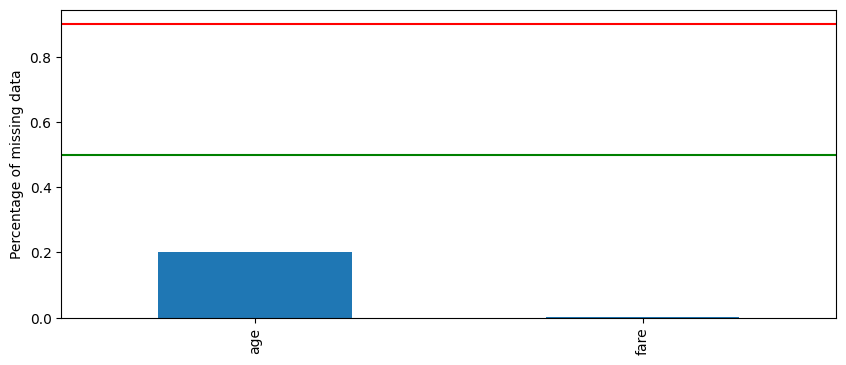

In [ ]:
# plot
data[vars_num_with_nan].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.50, color='g', linestyle='-')

plt.show()

Categorical variables

In [ ]:
# now in categorical variables

# make a list of the variables that contain missing values
vars_cat_with_nan = [var for var in vars_cat if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data
data[vars_cat_with_nan].isnull().mean().sort_values(ascending=False)

cabin       0.774637
embarked    0.001528
dtype: float64

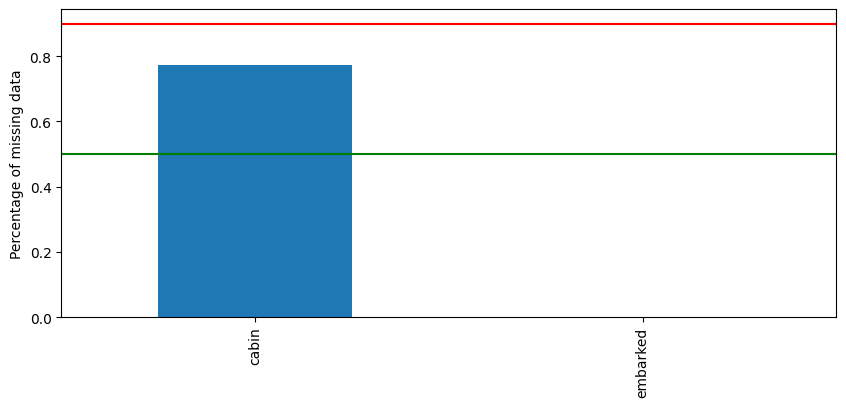

In [ ]:
# plot
data[vars_cat_with_nan].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.50, color='g', linestyle='-')

plt.show()

Relationship between missing data and survived

In [ ]:
def analyse_na_value(df, var, target):

    # copy of the dataframe, so that we do not override the original data
    # see the link for more details about pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determine the median price in the groups 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)[target].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title=target, color='green')

    plt.show()

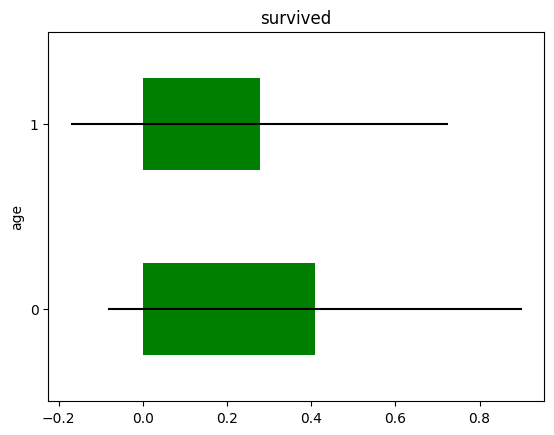

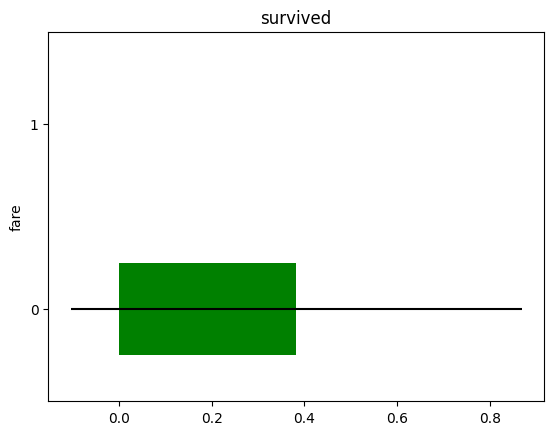

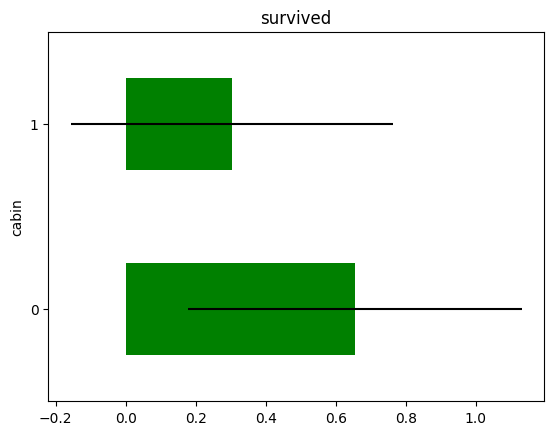

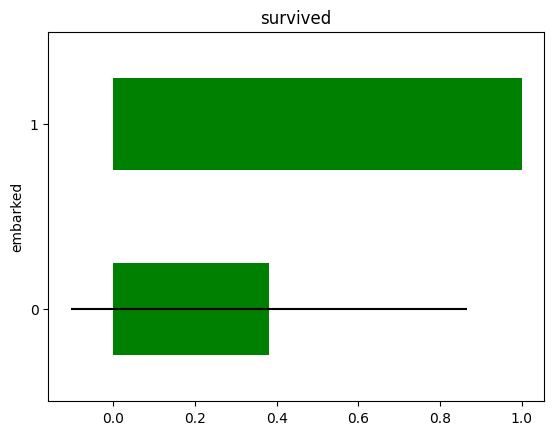

In [ ]:
# let's run the function on each variable with missing data

for var in vars_with_nan:
    analyse_na_value(data, var, target)

**Numerical variables**

*   Temporal variables
*   Discrete variables


*   Continuous variables
*   Distributions (Gaussian or Skewed)


*   Transformations
*   Outliers

**Determine the temporal variables**

In [ ]:
# list of temporal variables
temp_num_vars = []

*Conclusion: there is no temporal variable in data set*

**Determine the discrete variables**

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [ ]:
# let's male a list of discrete variables
discrete_num_vars = [var for var in vars_num if len(data[var].unique()) < 20 and var not in temp_num_vars]
# print the number of discrete variables
print('Number of discrete variables: ', len(discrete_num_vars))

Number of discrete variables:  3


In [ ]:
# let's visualise the discrete variables
data[discrete_num_vars].head()

,pclass,sibsp,parch
0,1,0,0
1,1,1,2
2,1,1,2
3,1,1,2
4,1,1,2


*Conclusion: There is 3 discrete variable in data set 'pclass', 'sibsp' and 'parch'*

**Determine the continuous variables**

Let's go ahead and find the continuous variables. We will consider continuous variables to all those that are not temporal or discrete.

In [ ]:
# make list of continuous variables
cont_num_vars = [var for var in vars_num if var not in temp_num_vars+discrete_num_vars]
# print the number of continuous variables
print('Number of continuous variables: ', len(cont_num_vars))

Number of continuous variables:  2


In [ ]:
# let's visualise the continuous variables
data[cont_num_vars].head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


*Conclusion: There is 2 continous variable in data set 'age' and 'fare'. 'age' is not normally distributed and 'fare' is skewed*

**Determine the distribution of numerical variables**



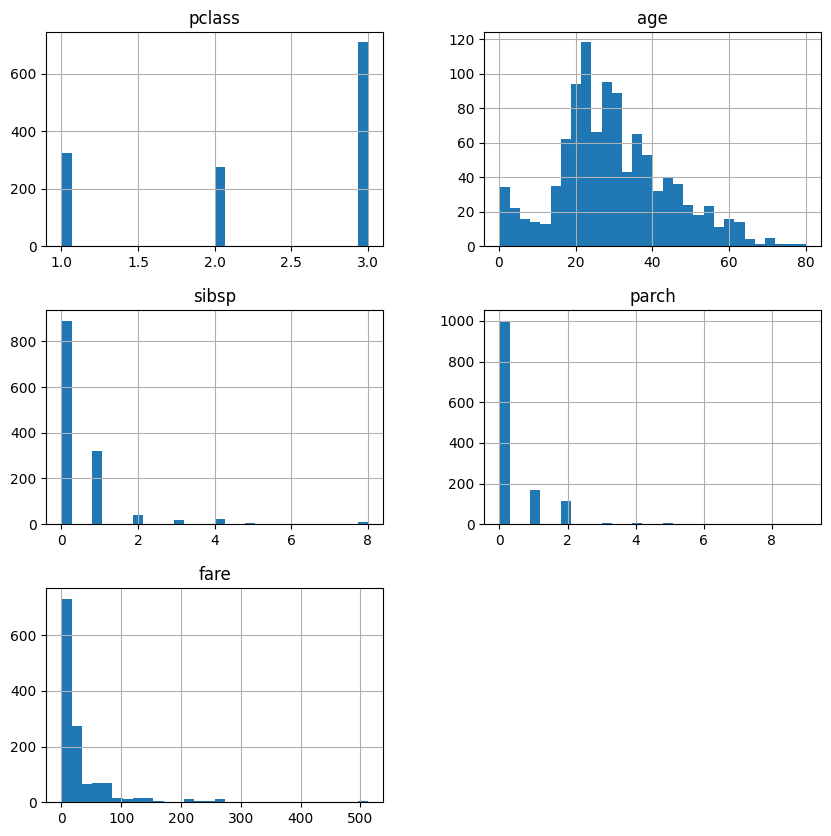

In [ ]:
# lets plot histograms for all continuous variables
data[vars_num].hist(bins=30, figsize=(10,10))
plt.show()

In [ ]:
# to study if variable is skewed or not

for var in vars_num:
  # Generate some example data (replace this with your dataset)
  data_set = data[var]

  # Calculate the skewness of the dataset
  skewness = skew(data_set)

  # Define a threshold for skewness (you can adjust this threshold as needed)
  threshold = 0.5  # You can set a different threshold based on your analysis

  # Check if the dataset is skewed or not
  if abs(skewness) > threshold:
      print("The dataset is skewed.")
      if skewness > 0:
          print("It is positively skewed.")
      else:
          print("It is negatively skewed.")
  else:
      print("The dataset is not skewed.")

  # Optionally, you can print the skewness value
  print("Variable, Skewness:", var, skewness)

The dataset is skewed.
It is negatively skewed.
Variable, Skewness: pclass -0.5979608943517511
The dataset is not skewed.
Variable, Skewness: age nan
The dataset is skewed.
It is positively skewed.
Variable, Skewness: sibsp 3.8398137982535094
The dataset is skewed.
It is positively skewed.
Variable, Skewness: parch 3.6648724205383774
The dataset is not skewed.
Variable, Skewness: fare nan




*   **Determination of distribution of numerical variables**




 Feature name is : pclass



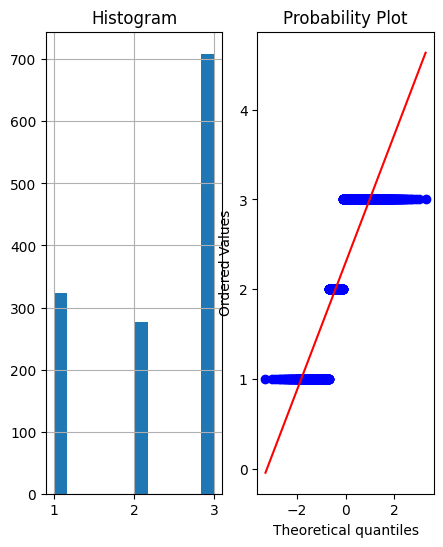



 Feature name is : age



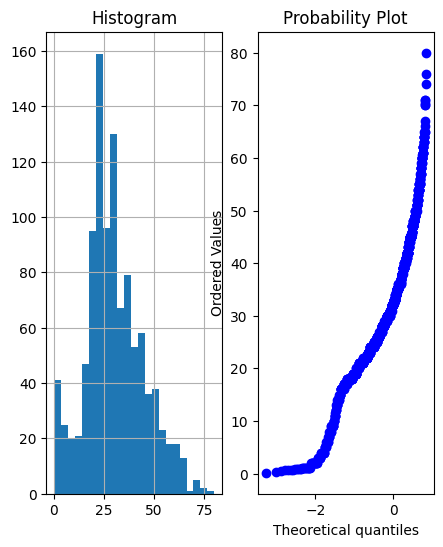



 Feature name is : sibsp



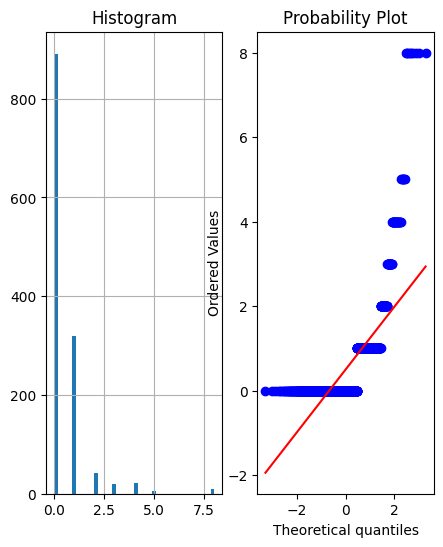



 Feature name is : parch



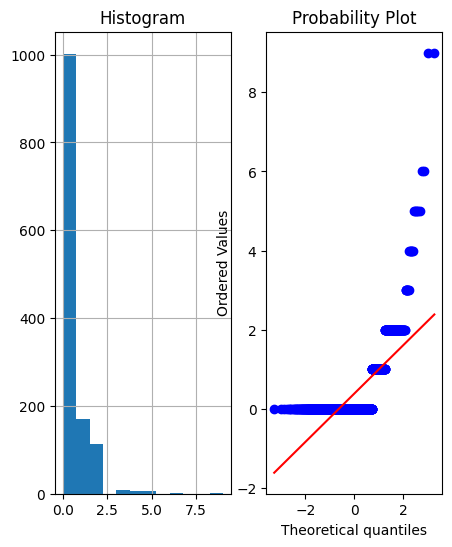



 Feature name is : fare



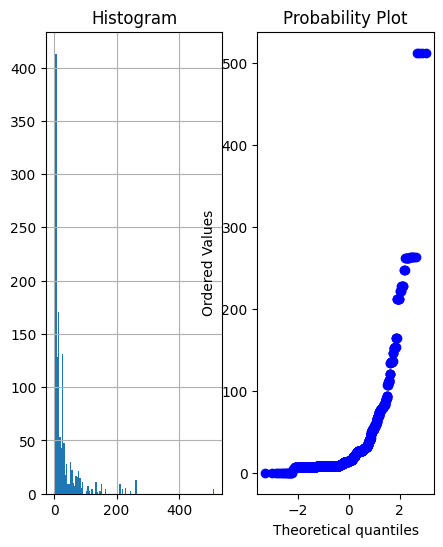

In [ ]:
# import python librairy
import scipy.stats as stats
import matplotlib.pyplot as plt

df = data # the dataframe you deal with

# Function to plot data and see if it's normal distributed or not
def diagnostic_plots(df, variable):
    print("\n\n Feature name is : {}\n".format(variable))
    plt.figure(figsize=(5,6))
    plt.subplot(1, 2, 1)
    plt.title("Histogram")
    df[variable].hist(bins='auto')
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

for col in vars_num: # df.columns
    diagnostic_plots(df, col)

*Conclusion: The 2 continous variable have a gaussian distribution*

**Outliers of numerical variables**

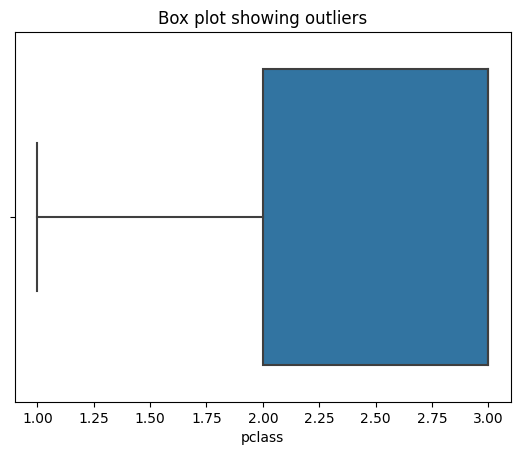

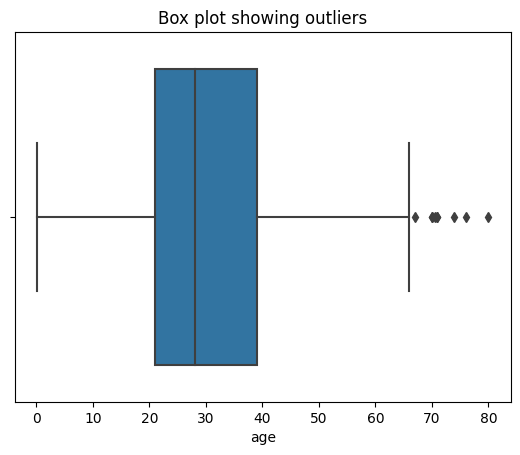

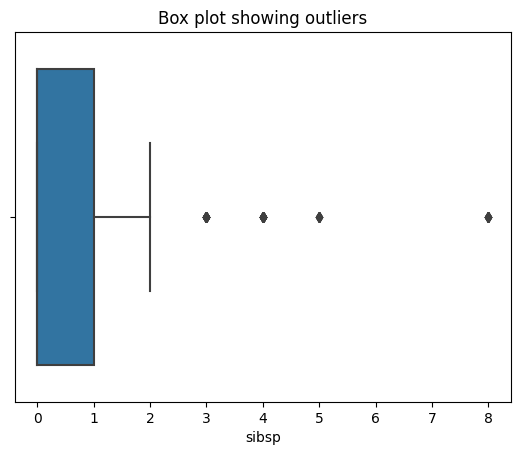

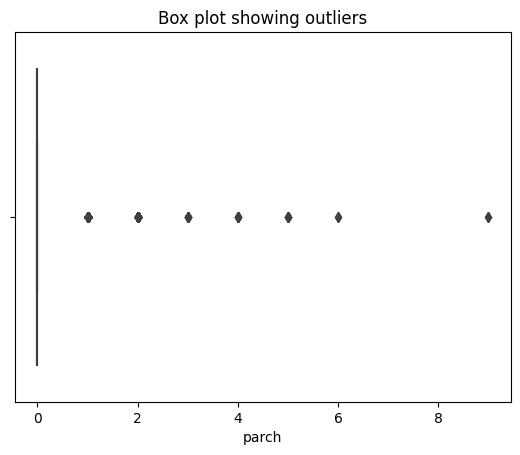

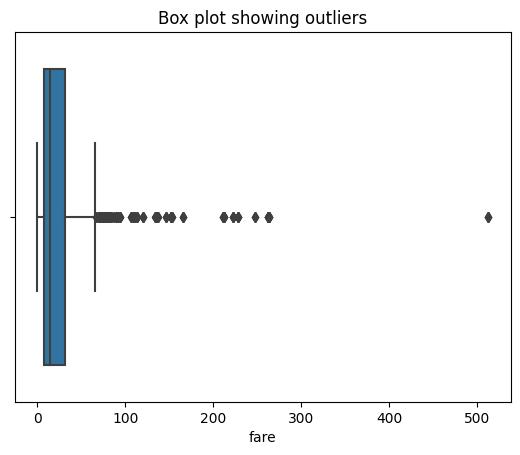

In [ ]:
# Code to see outliers in the variable
df = data
for var in vars_num:
  sns.boxplot(x = df[var])
  plt.title("Box plot showing outliers")
  plt.show()

*Conclusion:*

* Discrete variables
** with less or no outliers: 'pclass', 'sibsp' and 'parch' (3, 7 and 8 clusters)
** with many outliers: no

* Continuous variables
** with less or no outliers: 'age'
** with many outliers: 'fare'

**Categorical variables**


*   Cardinality
*   Quality variables and mappings
*   Special mappings
*   Rare Labels

In [ ]:
print('Number of categorical variables: ', len(vars_cat))

Number of categorical variables:  4


In [ ]:
# let's visualise the values of the categorical variables
data[vars_cat].head()

,sex,cabin,embarked,title
0,female,B5,S,Miss
1,male,C22,S,Master
2,female,C22,S,Miss
3,male,C22,S,Mr
4,female,C22,S,Mrs


**Determine cardinality of categorical variables**

In [ ]:
# Labels of all cardinality
for var in vars_cat:
  print(var, data[var].unique())

sex ['female' 'male']
cabin ['B5' 'C22' 'E12' 'D7' 'A36' 'C101' nan 'C62' 'B35' 'A23' 'B58' 'D15' 'C6'
 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7' 'C103' 'D22' 'E33'
 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51' 'B96' 'C46' 'E31' 'E8' 'B61'
 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52' 'E45' 'B22' 'B26' 'C85' 'E17'
 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18' 'C54' 'C45' 'D20' 'A29' 'C95'
 'E25' 'C111' 'C23' 'E36' 'D34' 'D40' 'B39' 'B41' 'B102' 'C123' 'E63'
 'C130' 'B86' 'C92' 'A5' 'C51' 'B42' 'C91' 'C125' 'D10' 'B82' 'E50' 'D33'
 'C83' 'B94' 'D49' 'D45' 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28'
 'C49' 'B52' 'E60' 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6'
 'D9' 'B80' 'C106' 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36'
 'D48' 'D47' 'C105' 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C110'
 'C50' 'B3' 'A24' 'A32' 'A11' 'A10' 'B57' 'C28' 'E44' 'A26' 'A6' 'A7'
 'C31' 'A19' 'B45' 'E34' 'B78' 'B50' 'C87' 'C116' 'C55' 'D50' 'E68' 'E67'
 'C126' 'C68' 'C70' 'C53

In [ ]:
# Labels and element number of all cardinality
data[vars_cat].nunique()

sex           2
cabin       181
embarked      3
title         5
dtype: int64

<Axes: >

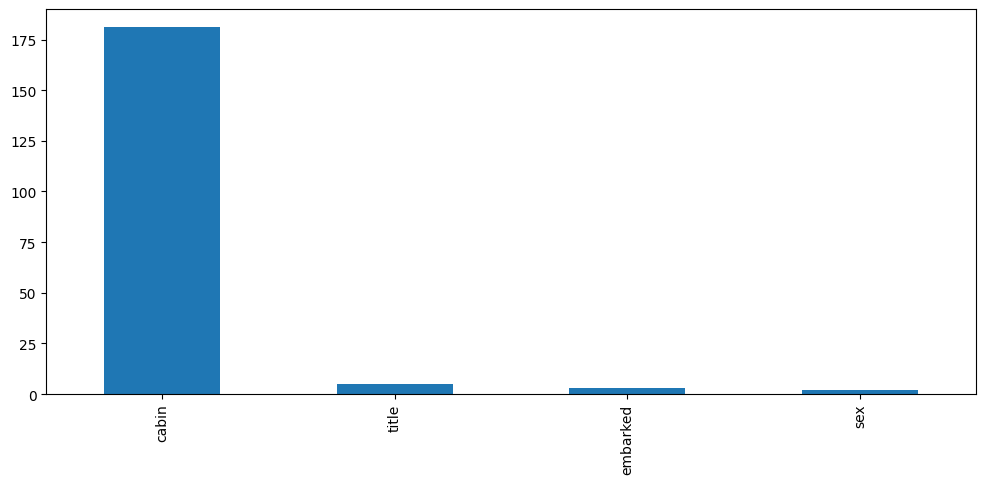

In [ ]:
# we count unique categories with pandas unique()
# and then plot them in descending order
data[vars_cat].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

'cabin' categorical variables show high cardinality than the others. This means that 'cabin' variable have many different labels and the others have only few different labels.

*Conclusion: that isn't good because we will need to tackle cardinality during our feature engineering lecture.*

**Determine quality categorical variables**

There aren't a number of variables that refer to the quality of some aspect of the problem.

For example, about the probleme of house price prediction, for the garage or the fence or the kitchen we have the quality aspect describe like as following:
- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa =	Fair
- Po = Poor

When we have those variables, we need to replace these categories by numbers increasing with the quality of the place or room.


*Conclusion: But here, we don't have this categorical variable in our problem*



In [ ]:
# capture all quality variables
qual_vars  = []

In [ ]:
# capture the remaining categorical variables
# (those that we did not re-map)
cat_others = [var for var in vars_cat if var not in qual_vars]
len(cat_others)

4

**Rare labels:**

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [ ]:
def analyse_rare_labels(df, var, target, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)[target].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations
for var in cat_others:
    print(analyse_rare_labels(data, var, target, rare_perc=0.01))
    print()

Series([], Name: survived, dtype: float64)

cabin
A10    0.000764
A11    0.000764
A14    0.000764
A16    0.000764
A18    0.000764
         ...   
F33    0.003056
F38    0.000764
F4     0.003056
G6     0.003820
T      0.000764
Name: survived, Length: 181, dtype: float64

Series([], Name: survived, dtype: float64)

Series([], Name: survived, dtype: float64)



'cabin' variable show multiple labels that are present in less than 1% of the houses.

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models.

*Conclusion: That is why we want to remove them.*

## **Feature Engineering**

In [ ]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization or plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to know if variable is skewed or not
from scipy.stats import skew

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# for variable transformation
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# load dataset
data0 = pd.read_csv('/content/sample_data/titanic.csv')
data=data0.copy()

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1309, 10)


,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


**The target**

Let's begin by exploring the target distribution.*texte en italique*

In [ ]:
# assign the target we want to predict
target = 'survived'
data_targ = data['survived']

In [ ]:
# check that that target columns is very well assign to data_target
data_targ.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

**No transformation applied**

Because it's classification problem, we don't need to apply transformation to target here

**Extract only the letter (and drop the number) from the variable Cabin**

In [ ]:
# remove all Numbers from Strings in the column 'cabin'
data['cabin'] = data['cabin'].str.replace('\d+', '', regex=True)
#data['cabin'] = data['cabin'].str[0] # captures the first letter

In [ ]:
# check that we capture the first letter of Strings in the column 'cabin'
data['cabin'].unique()

array(['B', 'C', 'E', 'D', 'A', nan, 'T', 'F', 'G'], dtype=object)

In [ ]:
# check that we capture the first letter of Strings in the column 'cabin'
data['cabin'].nunique()

8

**Variable types (categorical and numerical)**

In [ ]:
# we will capture those of type *object*
vars_cat = [var for var in data.columns if data[var].dtype == 'O']

# now let's identify the numerical variables
vars_num = [var for var in data.columns if var not in vars_cat and var != target]

# print the number of numerical and categorical variables
print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


**Missing values**

All variables

In [ ]:
# make a list of the variables that contain missing values
vars_with_nan = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_nan].isnull().mean().sort_values(ascending=False)

cabin       0.774637
age         0.200917
embarked    0.001528
fare        0.000764
dtype: float64

Numerical variables

In [ ]:
# first in numerical variables

# make a list of the variables that contain missing values
vars_num_with_nan = [var for var in vars_num if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data
data[vars_num_with_nan].isnull().mean().sort_values(ascending=False)


age     0.200917
fare    0.000764
dtype: float64

Categorical variables

In [ ]:
# now in categorical variables

# make a list of the variables that contain missing values
vars_cat_with_nan = [var for var in vars_cat if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data
data[vars_cat_with_nan].isnull().mean().sort_values(ascending=False)

cabin       0.774637
embarked    0.001528
dtype: float64

**Treatment of missing value for numerical variable**

To engineer missing values in numerical variables, we will:

- add a binary missing indicator variable
- and then replace the missing values in the original variable with the mean (or mediane, ...)

In [ ]:
# replace missing values as we described above

for var in vars_num_with_nan:

    # calculate the mean using the train set
    mean_val = data[var].median() #mean()

    print(var, mean_val)

    # add binary missing indicator (in train and test)
    data[var + '_nan'] = np.where(data[var].isnull(), 1, 0)

    # replace missing values by the mean
    # (in train and test)
    data[var].fillna(mean_val, inplace=True)

age 28.0
fare 14.4542


In [ ]:
# check that we have no more missing values in the engineered variables
data[vars_num_with_nan].isnull().sum()

age     0
fare    0
dtype: int64

In [ ]:
# check that test set does not contain null values in the engineered variables
[var for var in vars_num_with_nan if data[var].isnull().sum() > 0]

[]

In [ ]:
# check the binary missing indicator variables
data[['age_nan', 'fare_nan']].head()

,age_nan,fare_nan
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


**Temporal variables**

There is no temporal variable here

**Treatment of missing value for categorical variable**

To engineer missing values in categorical variables, we will:

- We will replace missing values with the string "missing" in those variables with a lot of missing data
- Alternatively, we will replace missing data with the most frequent category in those variables that contain fewer observations without values

This is common practice.

In [ ]:
# variables to impute with the string missing
with_string_missing = [
    var for var in vars_cat_with_nan if data[var].isnull().mean() > 0.1]

# variables to impute with the most frequent category
with_frequent_category = [
    var for var in vars_cat_with_nan if data[var].isnull().mean() < 0.1]

In [ ]:
with_string_missing

['cabin']

In [ ]:
with_frequent_category

['embarked']

In [ ]:
# replace missing values (missing rate > 10%) with new label: "Missing"
data[with_string_missing] = data[with_string_missing].fillna('Missing')

In [ ]:
# replace missing values (missing rate < 10%) with frequent label: "Missing"
for var in with_frequent_category:

    # there can be more than 1 mode in a variable
    # we take the first one with [0]
    mode = data[var].mode()[0]

    print(var, mode)

    data[var].fillna(mode, inplace=True)

embarked S


In [ ]:
# Another way to proceede replacement of missing value
# replace all missing values with new label: "Missing"
#data[vars_cat] = data[vars_cat].fillna('Missing')

In [ ]:
# check that we have no missing information in the engineered variables
data[vars_cat_with_nan].isnull().sum()

cabin       0
embarked    0
dtype: int64

In [ ]:
# check that test set does not contain null values in the engineered variables
[var for var in vars_cat_with_nan if data[var].isnull().sum() > 0]

[]

**Removing Rare Labels**

For the remaining categorical variables, we will group those categories that are present in less than 5% of the observations. That is, all values of categorical variables that are shared by less than 5% of total values of variables, well be replaced by the string "Rare".

To learn more about how to handle categorical variables visit our course [Feature Engineering for Machine Learning](https://www.trainindata.com/p/feature-engineering-for-machine-learning).

In [ ]:
# capture all quality variables
vars_cat_qual  = []

# capture the remaining categorical variables
# (those that we did not re-map)
vars_cat_others = [var for var in vars_cat if var not in vars_cat_qual]

len(vars_cat_others)

4

In [ ]:
def find_frequent_labels(df, var, rare_perc):

    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)[var].count() / len(df)
    return tmp[tmp > rare_perc].index


for var in vars_cat_others:

    # find the frequent categories
    frequent_ls = find_frequent_labels(data, var, rare_perc=0.05)

    print(var, frequent_ls)
    print()

    # replace rare categories by the string "Rare"
    data[var] = np.where(data[var].isin(frequent_ls), data[var], 'Rare')

sex Index(['female', 'male'], dtype='object', name='sex')

cabin Index(['C', 'Missing'], dtype='object', name='cabin')

embarked Index(['C', 'Q', 'S'], dtype='object', name='embarked')

title Index(['Miss', 'Mr', 'Mrs'], dtype='object', name='title')



In [ ]:
# check that we have 'Rare' labels in the column
data[vars_cat].nunique()

sex         2
cabin       3
embarked    3
title       4
dtype: int64

In [ ]:
# check that we have 'Rare' labels in the column
for var in vars_cat:
  print(var, data[var].unique())

sex ['female' 'male']
cabin ['Rare' 'C' 'Missing']
embarked ['S' 'C' 'Q']
title ['Miss' 'Rare' 'Mr' 'Mrs']


In [ ]:
# Remove the row witch contains Rare labels

#for var in data.columns:
#  data_without_Rare_labels = data.drop(data[data[var] == 'Rare'].index)

#data = data.drop(data[data['sex'] == 'Rare'].index)
#data = data.drop(data[data['cabin'] == 'Rare'].index)
#data = data.drop(data[data['embarked'] == 'Rare'].index)
#data = data.drop(data[data['title'] == 'Rare'].index)

In [ ]:
# check that we have no Rare labels in the engineered variables
#list_of_strings = ['Rare'] # list of string we want to check the presence
#data.isin(list_of_strings).sum()

In [ ]:
# check that test set does not contain Rare values in the engineered variables
#list_of_strings = ['Rare'] # list of string we want to check the presence
#[var for var in data.columns if data[var].isin(list_of_strings).sum() > 0]

**Perform one hot encoding of categorical variables into k-1 binary variables**

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [ ]:
for var in vars_cat_others:
    # to create the binary variables, we use get_dummies from pandas
    data = pd.concat([data, pd.get_dummies(data[var], prefix=var, drop_first=True)], axis=1)

# Drop or remove the variable encoded
data.drop(labels=vars_cat_others, axis=1, inplace=True)

# visualise the dataset
data.head()

# One-Hot Encoding of Categorical Column Using Pandas library
#ohe_data = pd.get_dummies(data, columns = ['sex', 'cabin', 'embarked', 'title'])

#ohe_data.head()

,pclass,survived,age,sibsp,parch,fare,age_nan,fare_nan,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare
0,1,1,29.0000,0,0,211.3375,0,0,0,0,1,0,1,0,0,0
1,1,1,0.9167,1,2,151.5500,0,0,1,0,0,0,1,0,0,1
2,1,0,2.0000,1,2,151.5500,0,0,0,0,0,0,1,0,0,0
3,1,0,30.0000,1,2,151.5500,0,0,1,0,0,0,1,1,0,0
4,1,0,25.0000,1,2,151.5500,0,0,0,0,0,0,1,0,1,0



**Saving data**

In [ ]:
# save the data set
data.to_csv('titanic_MV2.csv', index=False)

**Numerical variable (continuous variable) transformation**

We observed that the numerical variables aren't normally distributed. So here we will perform transformation (like Logarithmic, Yoe-Jonhson, ...) in order to get a more Gaussian-like distribution.

Before perform any transformation we need to have data set witch not contains missing value (like nan value).

That is the reason we perform transformation in this part of Feature engeneering



*   **Determination of distribution of numerical variables**


In [ ]:
# to study if variable is skewed or not

for var in vars_num:
  # Generate some example data (replace this with your dataset)
  data_set = data[var]

  # Calculate the skewness of the dataset
  skewness = skew(data_set)

  # Define a threshold for skewness (you can adjust this threshold as needed)
  threshold = 0.5  # You can set a different threshold based on your analysis

  # Check if the dataset is skewed or not
  if abs(skewness) > threshold:
      print("The dataset is skewed.")
      if skewness > 0:
          print("It is positively skewed.")
      else:
          print("It is negatively skewed.")
  else:
      print("The dataset is not skewed.")

  # Optionally, you can print the skewness value
  print("Variable, Skewness:", var, skewness)

The dataset is skewed.
It is negatively skewed.
Variable, Skewness: pclass -0.5979608943517511
The dataset is skewed.
It is positively skewed.
Variable, Skewness: age 0.5403638165934072
The dataset is skewed.
It is positively skewed.
Variable, Skewness: sibsp 3.8398137982535094
The dataset is skewed.
It is positively skewed.
Variable, Skewness: parch 3.6648724205383774
The dataset is skewed.
It is positively skewed.
Variable, Skewness: fare 4.3645008784110955




 Feature name is : pclass



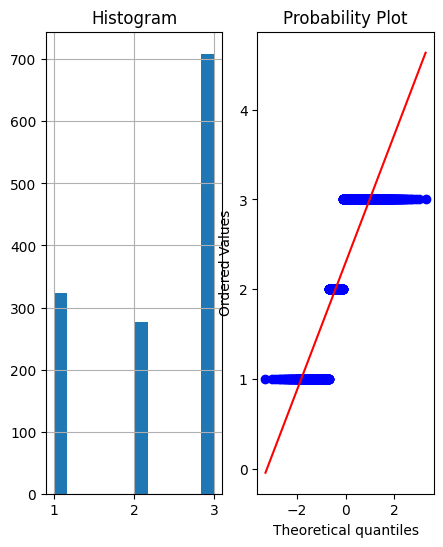



 Feature name is : age



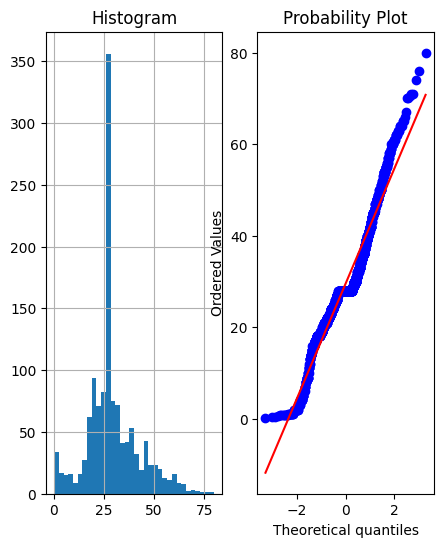



 Feature name is : sibsp



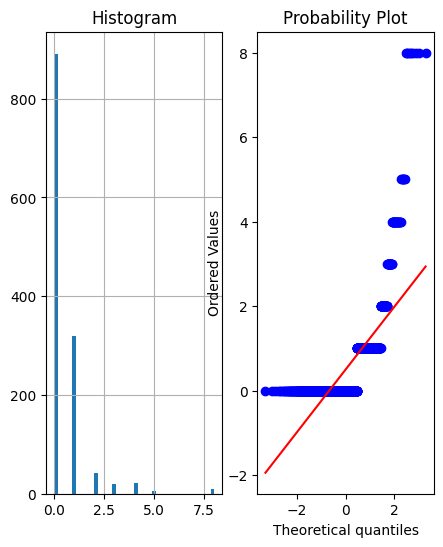



 Feature name is : parch



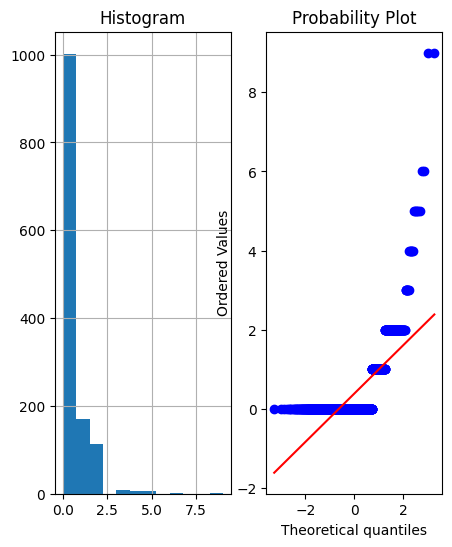



 Feature name is : fare



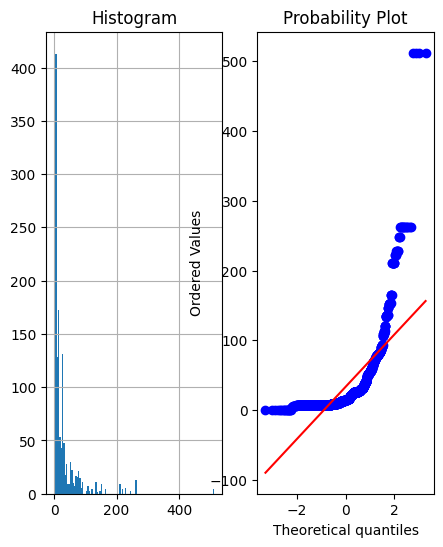

In [ ]:
# import python librairy
import scipy.stats as stats
import matplotlib.pyplot as plt

df = data # the dataframe you deal with

# Function to plot data and see if it's normal distributed or not
def diagnostic_plots(df, variable):
    print("\n\n Feature name is : {}\n".format(variable))
    plt.figure(figsize=(5,6))
    plt.subplot(1, 2, 1)
    plt.title("Histogram")
    df[variable].hist(bins='auto')
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

for col in vars_num: # df.columns
    diagnostic_plots(df, col)

*Conclusion:*

* Discrete variables
** with less or no outliers: 'pclass', 'sibsp' and 'parch' (3, 7 and 8 clusters)
** with many outliers: no

* Continuous variables
** with less or no outliers: 'age'
** with many outliers: 'fare'

<ipython-input-74-87790a3f90f9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var_transformed)


((array([-3.27442616, -3.01498165, -2.87056372, ...,  2.87056372,
          3.01498165,  3.27442616]),
  array([0., 0., 0., ..., 6., 7., 7.])),
 (0.6010859085325693, 0.3819709702062644, 0.7157995943315506))

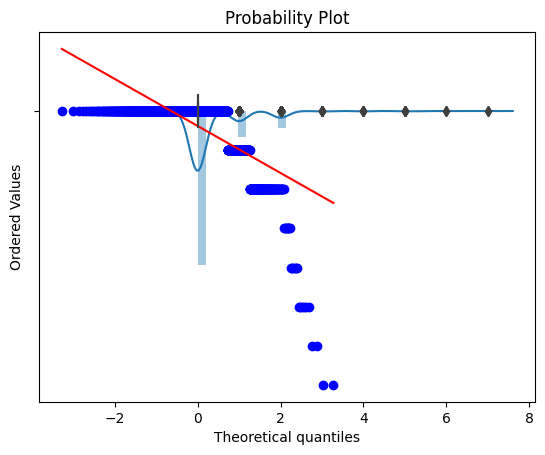

In [ ]:
# Discrete variables transformation
scaler = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans')
scaler.fit(data[['parch']])
var_transformed = scaler.transform(data[['parch']]).flatten()
sns.distplot(var_transformed)
sns.boxplot(x = var_transformed)

# Code to be ensure that, the variable transformed is normally distributed
stats.probplot(var_transformed, dist="norm", plot=plt)

<ipython-input-75-ed9d2e6b1228>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var_transformed)


((array([-3.27442616, -3.01498165, -2.87056372, ...,  2.87056372,
          3.01498165,  3.27442616]),
  array([0.      , 0.      , 0.      , ..., 0.997998, 1.      , 1.      ])),
 (0.27782208665648395, 0.2071276777159131, 0.738607038282159))

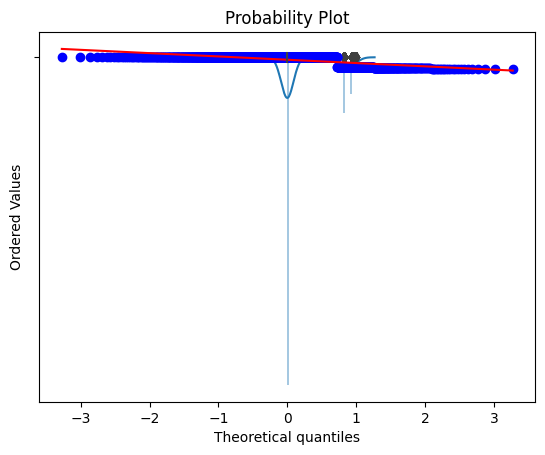

In [ ]:
# Discrete variables transformation
scaler = QuantileTransformer()
scaler.fit(data[['parch']])
var_transformed = scaler.transform(data[['parch']]).flatten()
sns.distplot(var_transformed)
sns.boxplot(x = var_transformed)

# Code to be ensure that, the variable transformed is normally distributed
stats.probplot(var_transformed, dist="norm", plot=plt)

<ipython-input-76-9599cc3c617e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_var)


<Axes: ylabel='Density'>

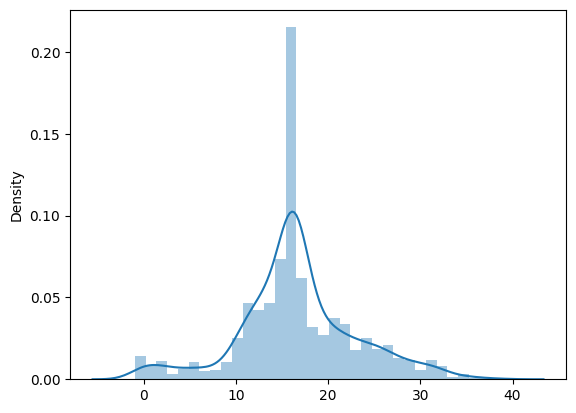

In [ ]:
# Bellow, you can see a code for this tasks : with less outliers
data_var , lambda_var = stats.boxcox(data['age'])
# the yeo-johnson transformation learns the best exponent to transform the variable
# it needs to learn it from the train set:
#data['age'], param = stats.yeojohnson(data['age'])
sns.distplot(data_var)

<ipython-input-77-ff6cfb4e382d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_var)


<Axes: ylabel='Density'>

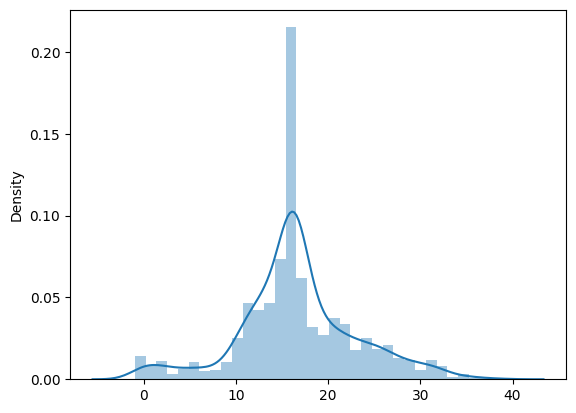

In [ ]:
# Bellow, you can see a code for this tasks : with less outliers
# the yeo-johnson transformation learns the best exponent to transform the variable
# it needs to learn it from the train set:
data['age'], param = stats.yeojohnson(data['age'])
sns.distplot(data_var)

<ipython-input-78-4aedbdc864a3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var_transformed)


((array([-3.27442616, -3.01498165, -2.87056372, ...,  2.87056372,
          3.01498165,  3.27442616]),
  array([0., 0., 0., ..., 1., 1., 1.])),
 (0.2832100091718578, 0.49989988376954425, 0.9778917916530608))

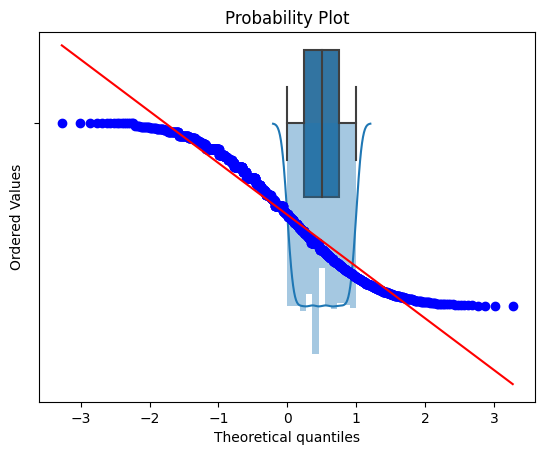

In [ ]:
# Continous variables transformation : with many outliers
scaler = QuantileTransformer()
scaler.fit(data[['fare']])
var_transformed = scaler.transform(data[['fare']]).flatten()
sns.distplot(var_transformed)
sns.boxplot(x = var_transformed)

# Code to be ensure that, the variable transformed is normally distributed
stats.probplot(var_transformed, dist="norm", plot=plt)

In [ ]:
# check that variable looks more like Gaussian distribution with transformation

# Remember, we have to specify column index to let the transformer know which transformation to apply on what column.
# Here [0] means freq, [1] means chord … and so on
# define the transformer for feature data
feature_transformer = ColumnTransformer(
    transformers=[
        ('age', PowerTransformer(method='yeo-johnson', standardize=False), [3]),
        ('sibsp', KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='kmeans'), [4]),
        ('parch', KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans'), [5]),
        ('fare', QuantileTransformer(), [6])
    ],
    remainder='passthrough'
)



 Feature name is : pclass



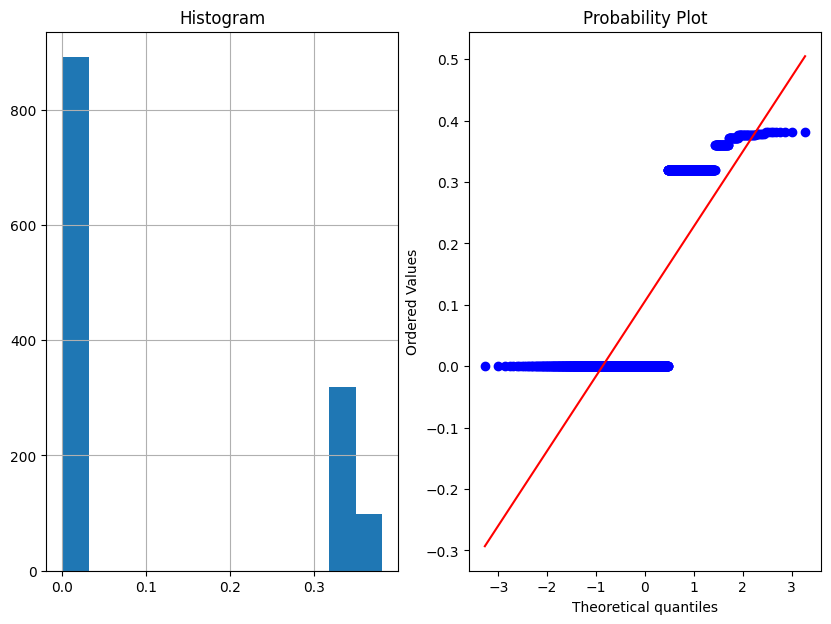



 Feature name is : age



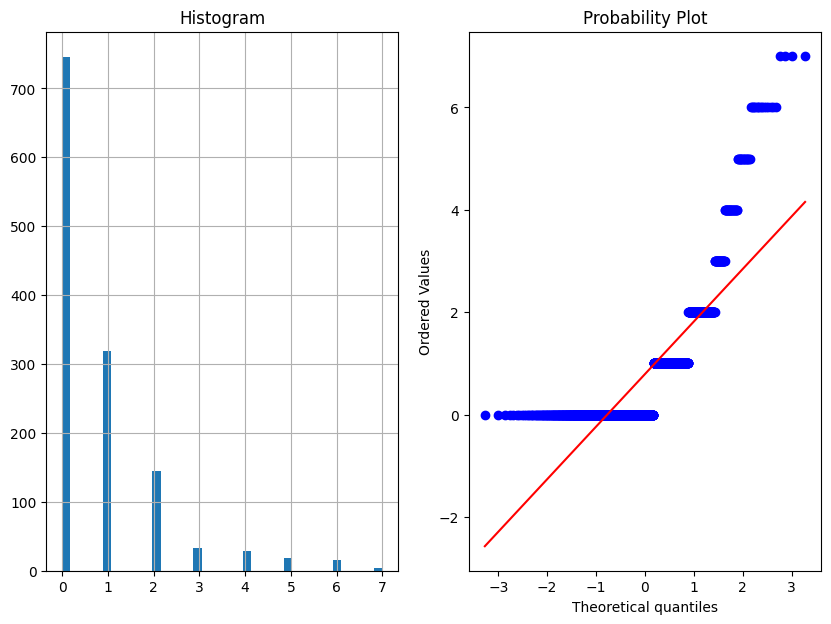



 Feature name is : sibsp



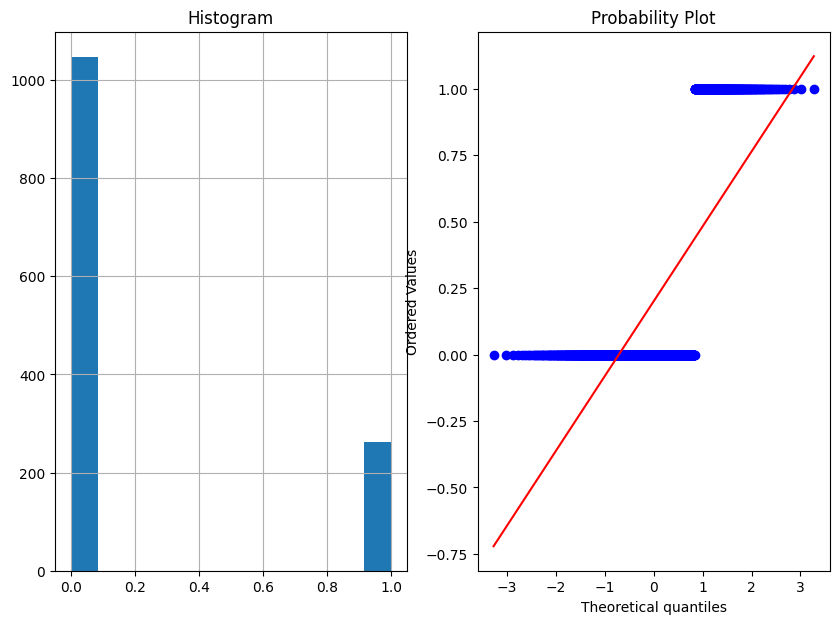



 Feature name is : parch



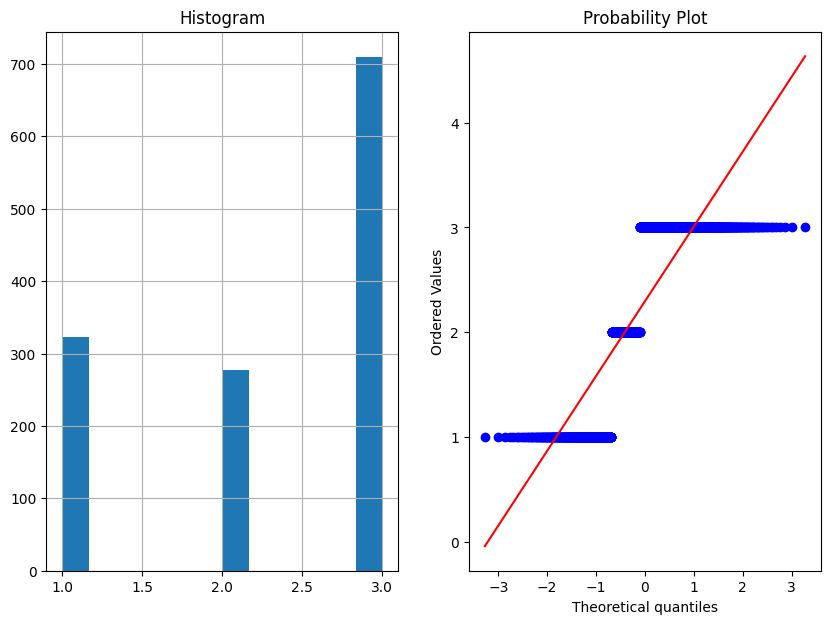



 Feature name is : fare



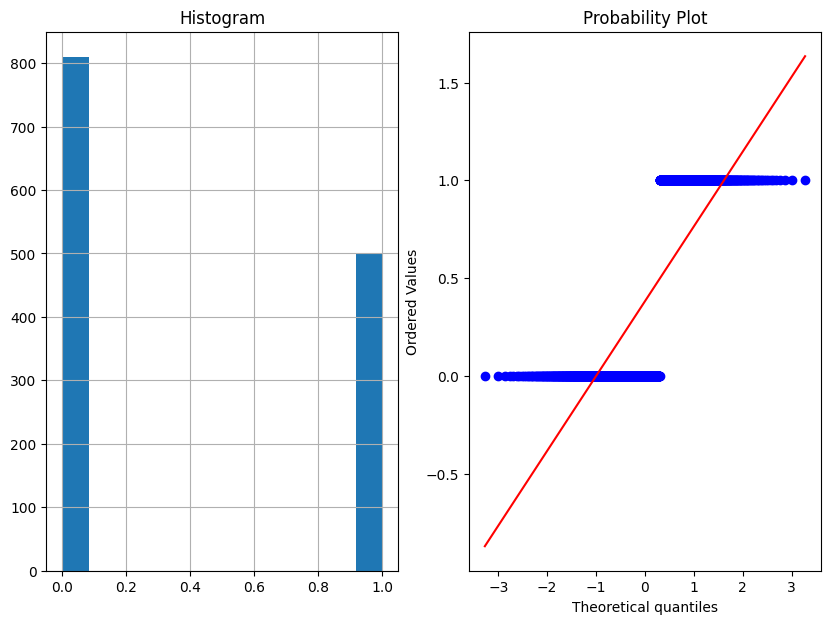

In [ ]:
# Apply transformer on X_train data
data_transformed = feature_transformer.fit_transform(data)
df = pd.DataFrame(data_transformed, columns=data.columns) # the dataframe you deal with,
df_transformed = df

# Function to plot data transformed
def diagnostic_plots(df, variable):
    print("\n\n Feature name is : {}\n".format(variable))
    plt.figure(figsize=(10,7))
    plt.subplot(1, 2, 1)
    plt.title("Histogram")
    df[variable].hist(bins='auto')
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

for col in vars_num:
    diagnostic_plots(df, col)

In [ ]:
# to study if variable is skewed or not

for var in vars_num:
  # Generate some example data (replace this with your dataset)
  data_set = df_transformed[var]

  # Calculate the skewness of the dataset
  skewness = skew(data_set)

  # Define a threshold for skewness (you can adjust this threshold as needed)
  threshold = 0.5  # You can set a different threshold based on your analysis

  # Check if the dataset is skewed or not
  if abs(skewness) > threshold:
      print("The dataset is skewed.")
      if skewness > 0:
          print("It is positively skewed.")
      else:
          print("It is negatively skewed.")
  else:
      print("The dataset is not skewed.")

  # Optionally, you can print the skewness value
  print("Variable, Skewness:", var, skewness)

The dataset is skewed.
It is positively skewed.
Variable, Skewness: pclass 0.7956556002315318
The dataset is skewed.
It is positively skewed.
Variable, Skewness: age 2.2281286205384467
The dataset is skewed.
It is positively skewed.
Variable, Skewness: sibsp 1.4928564385780365
The dataset is skewed.
It is negatively skewed.
Variable, Skewness: parch -0.5979608943517511
The dataset is not skewed.
Variable, Skewness: fare 0.4858466543775303


*Conclusion:*

Only variable age is not have Gaussian distribution. We need to perform another transformation (like logarithmic for example) untill we obtain Gaussian distribution.

If we don't have it after perform all transformation, then we will class 'age' variable in skewed variable

In [ ]:
# first make a list with the super skewed variables
# for later
#skewed_cont_num_vars = data['fare']

In [ ]:
# capture the remaining continuous variables
#no_skewed_cont_num_vars = data['age']

**Binarize skewed variables**

We don't have here a variable very skewed, so we would not transform those into binary variables.

In [ ]:
skewed = []

for var in skewed:
    # map the variable values into 0 and 1
    data[var] = np.where(data[var]==0, 0, 1)

**Separate data into train and test**

Use the code below for reproducibility. Don't change it.

In [ ]:
# Data set we want to use
data = data

# Split data into train and test sat
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(target, axis=1),  # predictors
    data[target],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 15), (262, 15))

**Scale the variables**

- Use the standard scaler from Scikit-learn

In [ ]:
# create scaler
scaler = StandardScaler()

#  fit  the scaler to the train set
scaler.fit(X_train)

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

In [ ]:
# X_train vizualisation
X_train.head()

,pclass,age,sibsp,parch,fare,age_nan,fare_nan,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare
0,0.835808,-0.322497,-0.478911,-0.455423,-0.504782,-0.494921,-0.03092,0.761042,0.551235,-0.434076,-0.319539,0.636686,0.869892,-0.435629,-0.275778
1,-1.542157,0.908273,-0.478911,-0.455423,1.971555,-0.494921,-0.03092,-1.313987,-1.814107,2.303742,-0.319539,-1.570633,-1.149569,-0.435629,-0.275778
2,0.835808,-0.081244,-0.478911,-0.455423,-0.508533,2.020526,-0.03092,0.761042,0.551235,-0.434076,3.129507,-1.570633,0.869892,-0.435629,-0.275778
3,0.835808,-0.911481,-0.478911,-0.455423,-0.507717,-0.494921,-0.03092,-1.313987,0.551235,-0.434076,-0.319539,0.636686,-1.149569,-0.435629,-0.275778
4,-0.353174,-0.002072,0.434422,-0.455423,-0.248980,-0.494921,-0.03092,0.761042,0.551235,-0.434076,-0.319539,0.636686,0.869892,-0.435629,-0.275778


In [ ]:
# X_test vizualisation
X_test.head()

,pclass,age,sibsp,parch,fare,age_nan,fare_nan,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare
0,0.835808,0.686792,-0.478911,-0.455423,-0.505353,-0.494921,-0.03092,0.761042,0.551235,-0.434076,-0.319539,0.636686,0.869892,-0.435629,-0.275778
1,-0.353174,-0.654039,-0.478911,0.727773,-0.248980,-0.494921,-0.03092,-1.313987,0.551235,-0.434076,-0.319539,0.636686,-1.149569,-0.435629,-0.275778
2,-0.353174,0.981314,0.434422,-0.455423,-0.131595,-0.494921,-0.03092,0.761042,0.551235,-0.434076,-0.319539,0.636686,0.869892,-0.435629,-0.275778
3,0.835808,-0.081244,-0.478911,-0.455423,-0.376148,2.020526,-0.03092,0.761042,0.551235,-0.434076,-0.319539,0.636686,0.869892,-0.435629,-0.275778
4,-0.353174,-0.322497,-0.478911,-0.455423,-0.043556,-0.494921,-0.03092,0.761042,0.551235,-0.434076,-0.319539,0.636686,0.869892,-0.435629,-0.275778


In [ ]:
# let's now save the train and test sets for the next notebook!

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

In [ ]:
# now let's save the scaler

joblib.dump(scaler, 'minmax_scaler.joblib')

['minmax_scaler.joblib']

**Saving data after finishing feature engeneering**

In [ ]:
# save the data set
data.to_csv('titanic_after_FE.csv', index=False)

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [ ]:
# set up the model
# remember to set the random_state / seed

model = LogisticRegression(C=0.0005, random_state=0)

# train the model
model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [ ]:
# make predictions for test set
class_ = model.predict(X_train)
pred = model.predict_proba(X_train)[:,1]

# determine mse and rmse
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
print()

# make predictions for test set
class_ = model.predict(X_test)
pred = model.predict_proba(X_test)[:,1]

# determine mse and rmse
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
print()

train roc-auc: 0.8434969088098918
train accuracy: 0.7125119388729704

test roc-auc: 0.8344753086419754
test accuracy: 0.6984732824427481



That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**